<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_13_Sazonais_AutoARIMApassageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries temporais sazonais: AutoARIMA

Este notebook busca uma série temporal de um arquivo escolhido a aplica os modelos SARIMA com seleção automática de $(p,d,q)(P,D,Q)_m$.

Data da última atualização: 17/03/2025

#### Preliminares

In [ ]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [ ]:
# Leitura do arquivo de dados
MinhaSerieTemporal = pd.read_csv('Passageiros.csv', index_col = 0)

# Ajuste do índice para formato DateTime
MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

# Exibição do DataFrame
MinhaSerieTemporal

,Passageiros (milhares)
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Mês'>

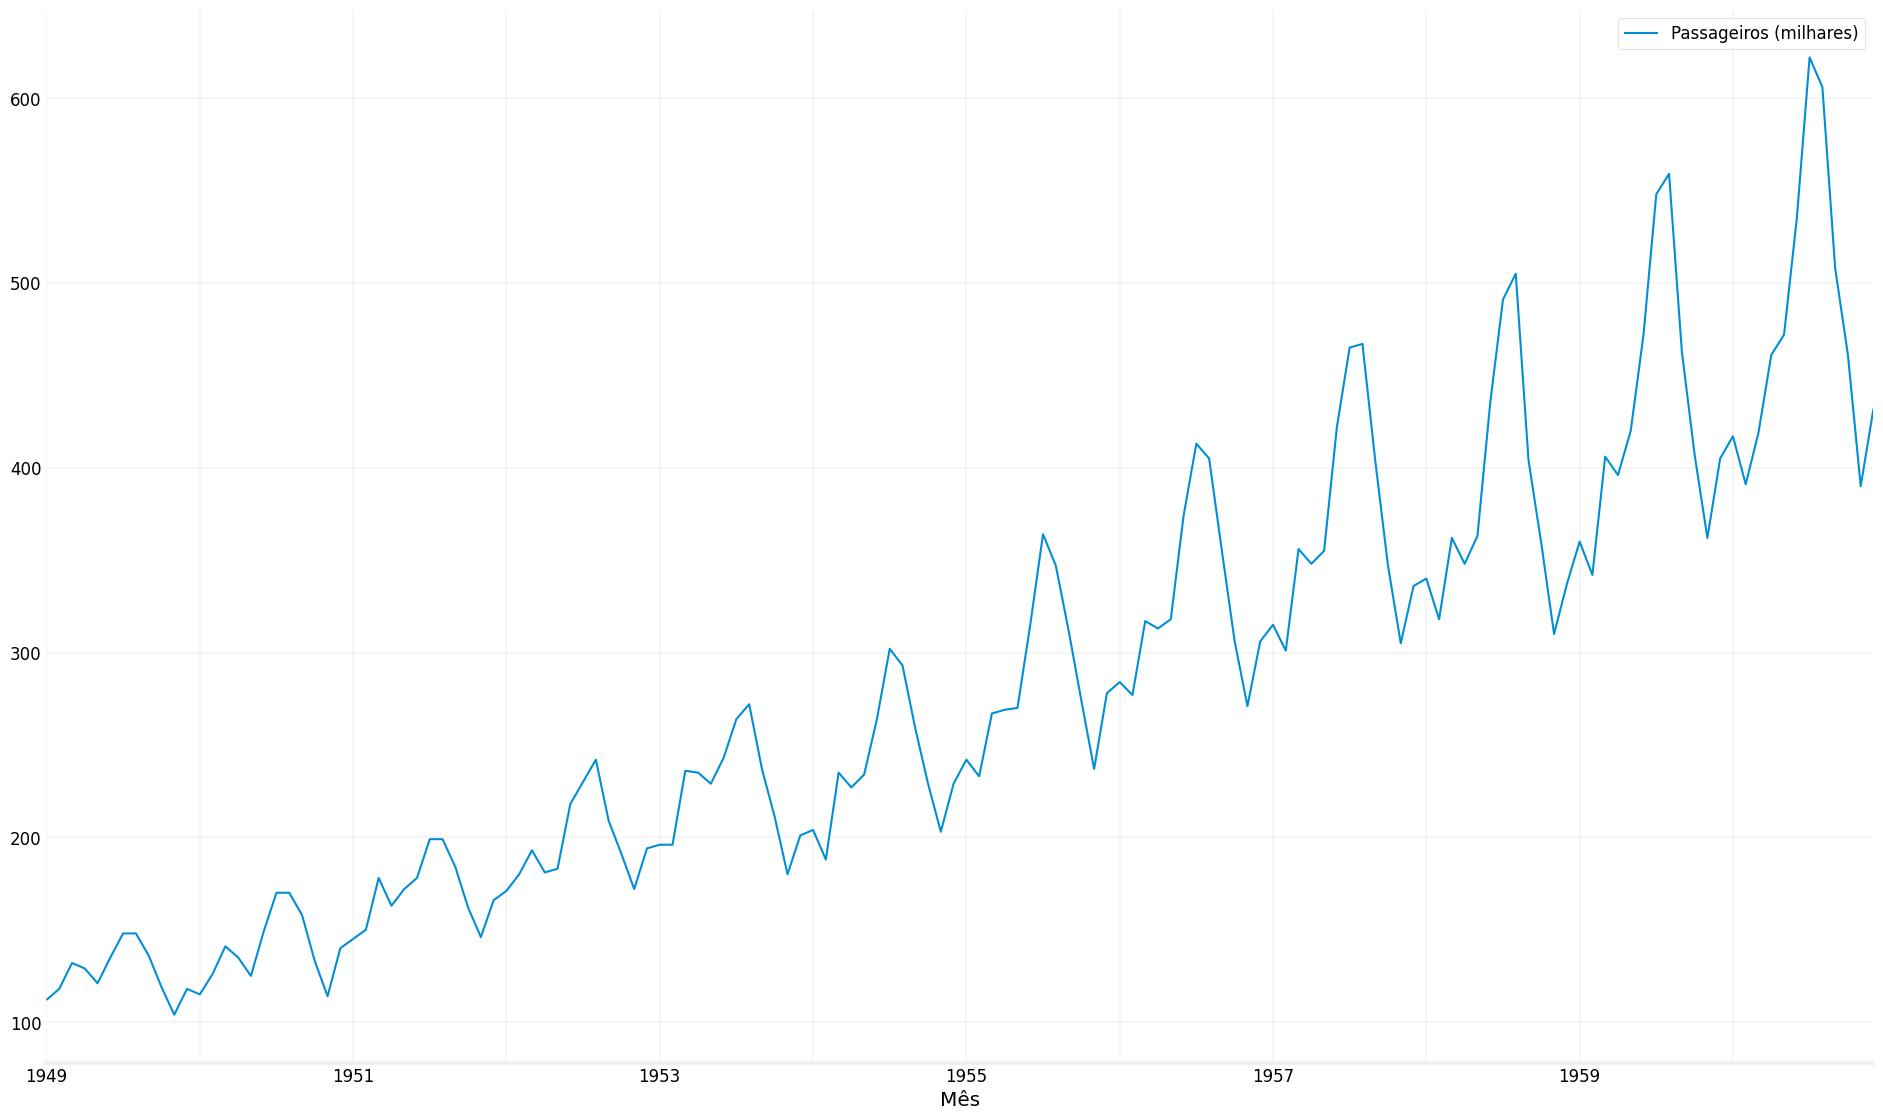

In [ ]:
# Gráfico
MinhaSerieTemporal.plot()

#### Separação das bases de treino e teste

<Axes: xlabel='Mês'>

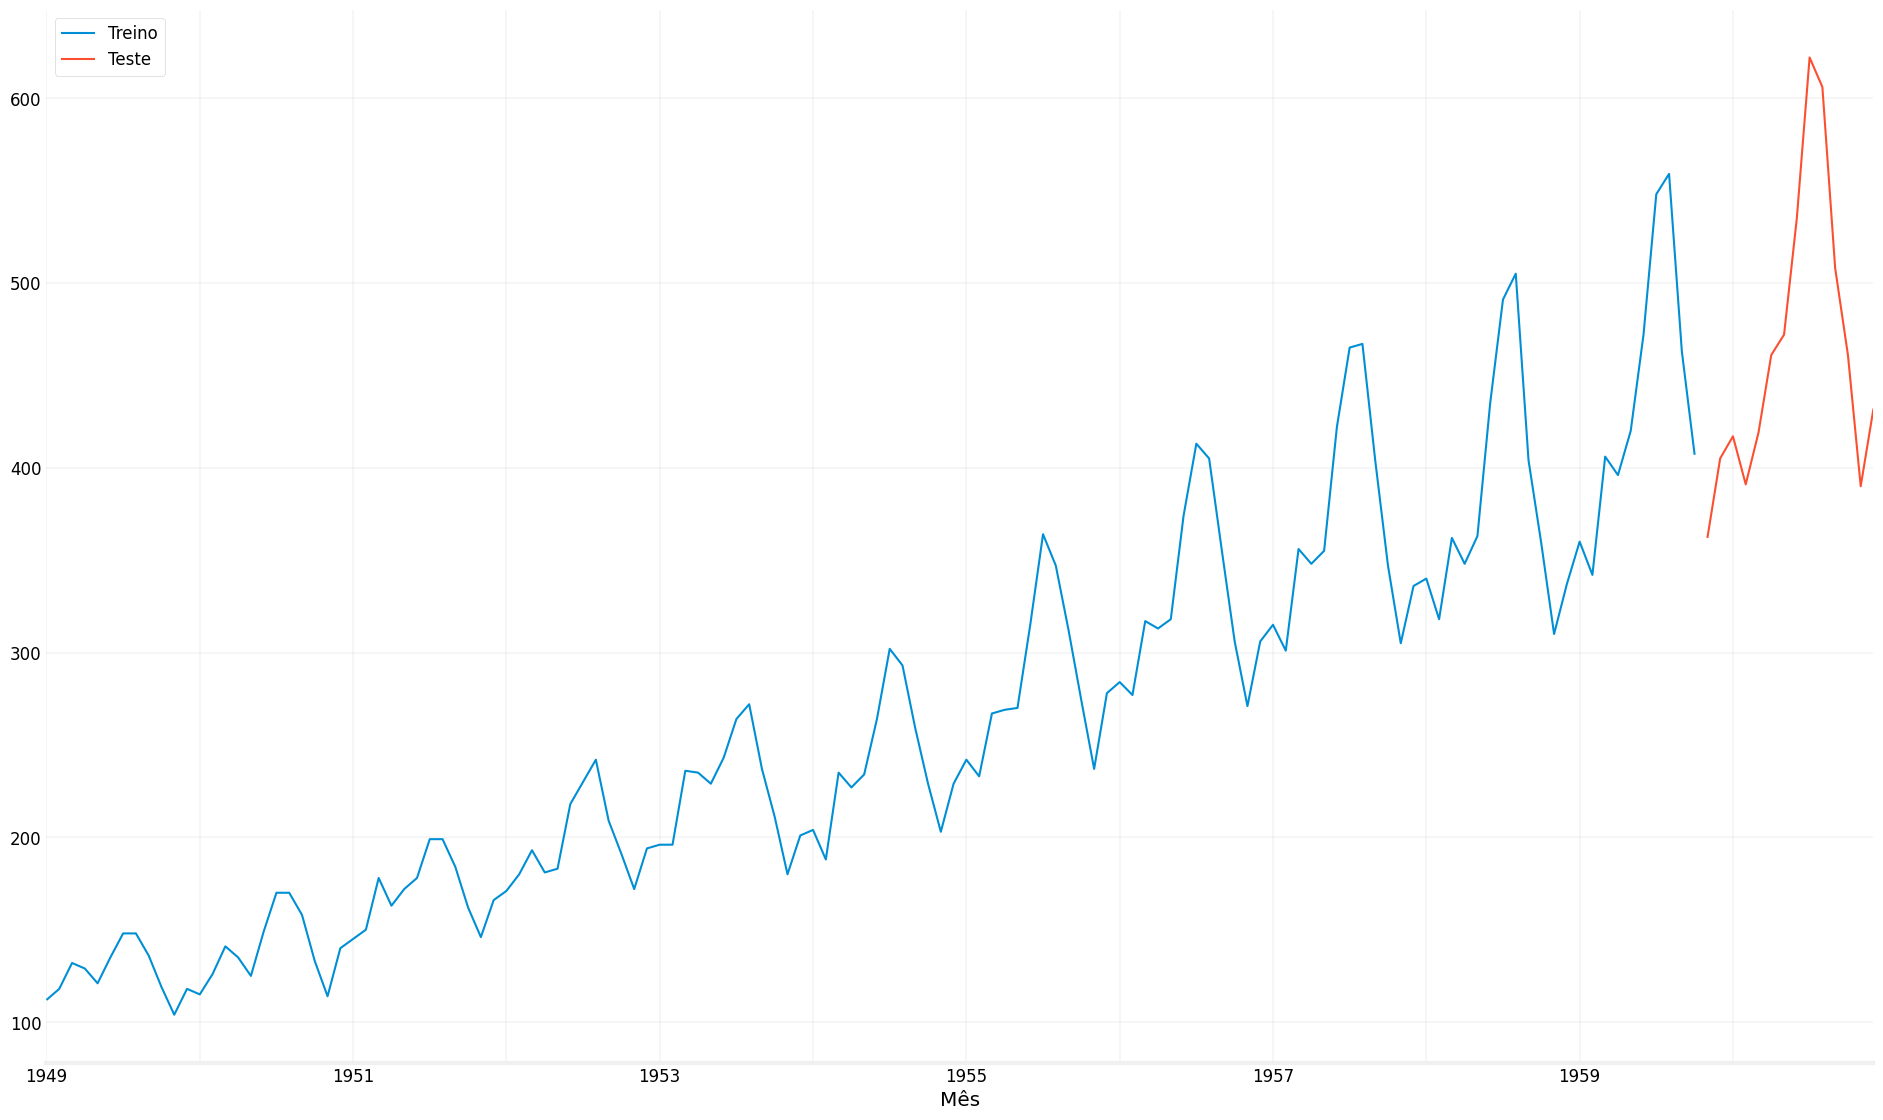

In [ ]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

# Exibe a série temporal, com a separação da base de dados
pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo algoritmo AutoARIMA

In [ ]:

# Formatação do DataFrame no padrão do StatsForecast
SerieSF = pd.DataFrame()
SerieSF['ds'] = TreinoDF .index.values
SerieSF['y']  = TreinoDF [TreinoDF.columns[0]].values
SerieSF['unique_id'] = TreinoDF.columns[0]

SerieSF

,ds,y,unique_id
0,1949-01-01,112,Treino
1,1949-02-01,118,Treino
2,1949-03-01,132,Treino
3,1949-04-01,129,Treino
4,1949-05-01,121,Treino
...,...,...,...
125,1959-06-01,472,Treino
126,1959-07-01,548,Treino
127,1959-08-01,559,Treino
128,1959-09-01,463,Treino


In [ ]:
season_length = 12        # anual

InstanteInicial = dt.datetime.now()

# Realiza o ajuste do modelo escolhido
models = [AutoARIMA(season_length=season_length)]
sf = StatsForecast(models=models, freq='ME')
sf.fit(df=SerieSF)

InstanteFinal = dt.datetime.now()

print(f'Modelo: {arima_string(sf.fitted_[0,0].model_)}')
print(f'Tempo:  {str(InstanteFinal - InstanteInicial)}')

Modelo: ARIMA(1,1,0)(0,1,0)[12]                   
Tempo:  0:00:00.212197


In [ ]:

# Define o horizonte futuro de previsões out-of-sample
HorizontePrev = 24

# Realiza as previsões com o modelo ajustado
sf.predict(h = HorizontePrev)


,unique_id,ds,AutoARIMA
0,Treino,1959-10-31,360.736420
1,Treino,1959-11-30,387.055695
2,Treino,1959-12-31,410.225037
3,Treino,1960-01-31,392.182922
4,Treino,1960-02-29,456.193390
5,Treino,1960-03-31,446.190796
6,Treino,1960-04-30,470.191437
7,Treino,1960-05-31,522.191284
8,Treino,1960-06-30,598.191284
9,Treino,1960-07-31,609.191284
